## Population and Sample

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Create a Population DataFrame with 10 data 
data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

In [4]:
# Draw sample with replacement, size=5 from Population
a_sample_with_replacement = data['Population'].sample(5, replace=True)
print(a_sample_with_replacement)

4    19
5    13
2    85
6    72
3    20
Name: Population, dtype: int64


In [5]:
# Draw sample without replacement, size=5 from Population
a_sample_with_replacement = data['Population'].sample(5, replace=False)
print(a_sample_with_replacement)

4    19
7    16
9    60
2    85
0    47
Name: Population, dtype: int64


# Parameters and Statistics

In [8]:
# Calculate mean and variance
population_mean = data['Population'].mean()
population_var = data['Population'].var(ddof=0) # ddof=1 means n-1, unbiased
print('Population mean is ', population_mean)
print('Population variance is', population_var)

Population mean is  43.0
Population variance is 571.8


In [9]:
# Calculate sample mean and sample standard deviation, size =10
a_sample = data['Population'].sample(10, replace=True)
sample_mean = a_sample.mean()
sample_var = a_sample.var()
print('Sample mean is ', sample_mean)
print('Sample variance is', sample_var)

Sample mean is  42.2
Sample variance is 474.40000000000003


# Average of an unbiased estimator

In [10]:
sample_length = 500
sample_variance_collection = [data['Population'].sample(10, replace=True).var(ddof=1) for i in range(sample_length)]

In [12]:
#sample_variance_collection

# Variation of Sample

In [14]:
from scipy.stats import norm
%matplotlib inline

In [15]:
# Sample mean and SD keep changing, but always within a certain range
Fstsample = pd.DataFrame(np.random.normal(10, 5, size=30))
print('sample mean is ', Fstsample[0].mean())
print('sample SD is ', Fstsample[0].std(ddof=1))

sample mean is  10.482337116772943
sample SD is  4.508803568432516


## Empirical Distribution of mean

In [16]:
meanlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())

In [18]:
collection = pd.DataFrame()
collection['meanlist'] = meanlist

<AxesSubplot:>

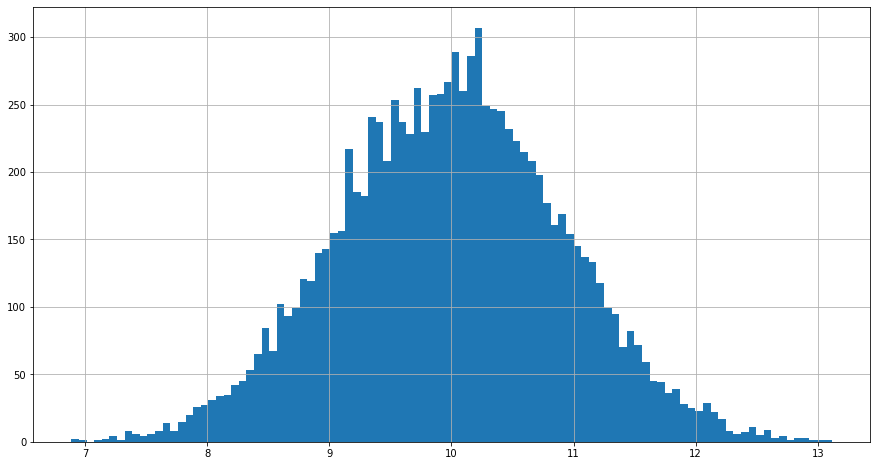

In [22]:
collection['meanlist'].hist(bins=100, figsize=(15,8))

## Sampling from arbritary distribution

array([[<AxesSubplot:title={'center':'meanlist'}>]], dtype=object)

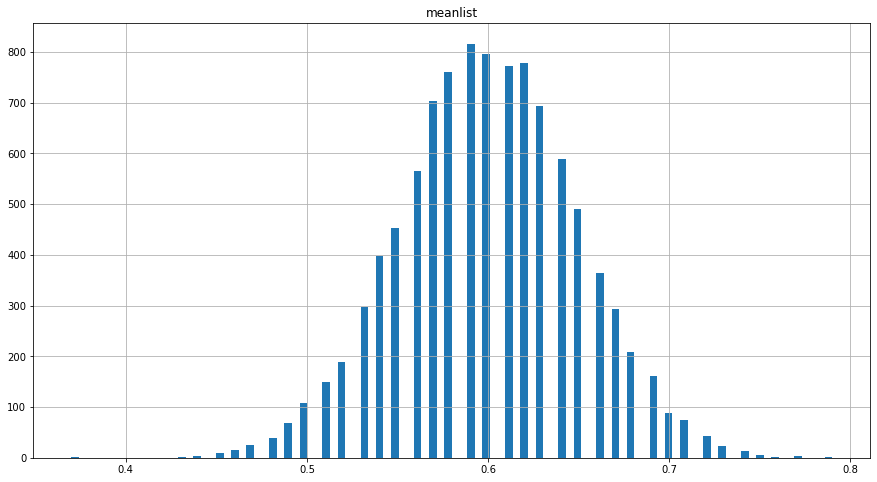

In [24]:
# See what central limit theorem tells you...the sample size is larger enough, 
# the distribution of sample mean is approximately normal
# apop is not normal, but try to change the sample size from 100 to a larger number. The distribution of sample mean of apop 
# becomes normal.
sample_size = 100
sample_size1 = 10000
samplemeanlist = []
apop = pd.DataFrame([1, 0, 1, 0, 1])
for _ in range(10000):
    sample = apop[0].sample(sample_size, replace=True) # small sample size
    #sample = apop[0].sample(sample_size1, replace=True) # big sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, figsize=(15,8))

In [58]:
import yfinance as yf
import os

In [59]:
spx = yf.download('SPY', '2018-04-01', '2021-05-21')

[*********************100%***********************]  1 of 1 downloaded


In [60]:
path = os.path.join(os.getcwd())
spx.to_csv(path + 'SPY.csv')

In [64]:
spy = pd.read_csv('SPY.csv', index_col='Date')

In [65]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,262.55,263.13,254.67,257.47,243.61,186286300
2018-04-03,258.87,261.31,256.84,260.77,246.73,119956900
2018-04-04,256.75,264.36,256.60,263.56,249.37,123715300
2018-04-05,265.55,266.64,264.32,265.64,251.34,82652600
2018-04-06,263.42,265.11,258.00,259.72,245.73,179521200


# Confidence Interval

## Estimate the average stock return with 90% Confidence Interval

In [127]:
# use log return for average stock return of SPY
spy['logreturn'] = np.log(spy['Adj Close'].shift(-1)) - np.log(spy['Adj Close'])

In [128]:
# build 90% confidence interval for log return
sample_size = spy['logreturn'].shape[0]
sample_mean = spy['logreturn'].mean()
sample_std = spy['logreturn'].std(ddof=1) / (sample_size**0.5)

# left and right quantile
z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

# upper and lower bound
interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std


In [129]:
# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".

print('90% confidence interval is ', (interval_left*100, interval_right*100)) # present as pct

90% confidence interval is  (-0.014723820585077365, 0.1497578473249957)


# Hypothesis Testing

In [78]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Adj Close Price of SPY from 2018 to 2021'}, xlabel='Date', ylabel='US $'>

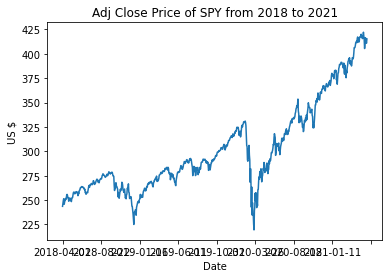

In [80]:
plt.title('Adj Close Price of SPY from 2018 to 2021', size=30)
plt.xlabel('Date', size=20)
plt.ylabel('US $', size=20)
spy['Adj Close'].plot()

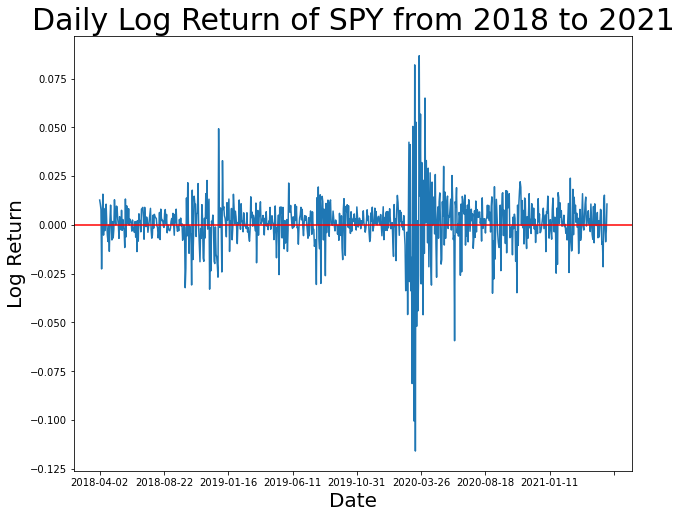

In [85]:
plt.title('Daily Log Return of SPY from 2018 to 2021', size=30)
plt.xlabel('Date', size=20)
plt.ylabel('Log Return', size=20)
spy['logreturn'].plot(figsize=(10,8))
plt.axhline(0, color='red')

<AxesSubplot:title={'center':'Histogram of Daily Log Return of SPY from 2018 to 2021'}>

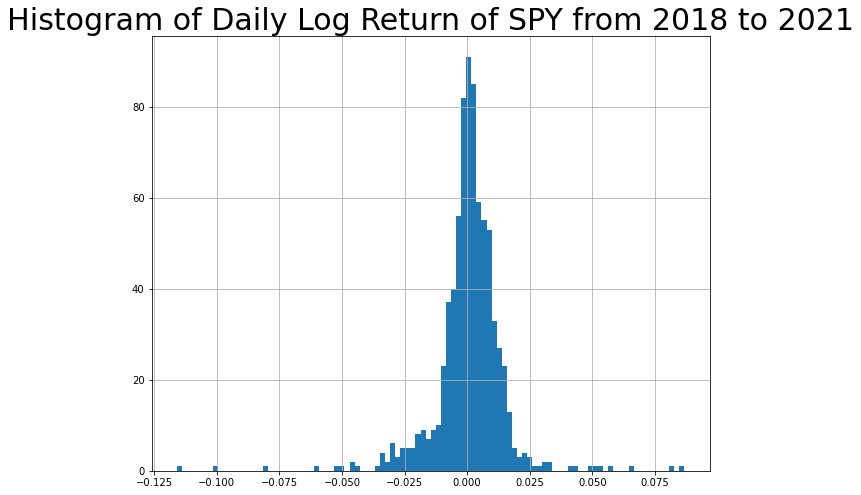

In [86]:
plt.title('Histogram of Daily Log Return of SPY from 2018 to 2021', size=30)
spy['logreturn'].hist(bins=100, figsize=(10,8))

## Steps involved in testing a claim by hypothesis testing

### Step 1: Set hypothesis (Two-Tail test)

$H_0 : \mu = 0$ 
$H_a : \mu \neq 0$

H0 means the average stock return is 0
H1 means the average stock return is not equal to 0

### Step 2: Calculate test statistic

In [95]:
sample_mean = spy['logreturn'].mean()
sample_std = spy['logreturn'].std(ddof=1)
n = spy['logreturn'].shape[0]

zhat = (sample_mean - 0) / (sample_std/n**0.5)
print(zhat)

1.3503706003665499


### Step 3: Set desicion criteria

In [96]:
# confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


### Step 4:  Make decision - shall we reject H0?

In [97]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


## One tail test 

$H_0 : \mu \leq 0$ 
$H_a : \mu > 0$

In [99]:
# step 2
sample_mean = spy['logreturn'].mean()
sample_std = spy['logreturn'].std(ddof=1)
n = spy['logreturn'].shape[0]

zhat = (sample_mean - 0) / (sample_std/n**0.5)
print(zhat)

1.3503706003665499


In [100]:
# step 3
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.6448536269514722


In [101]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: False


# An alternative method: p-value

In [102]:
# step 3 (p-value)
pval = 1 - norm.cdf(zhat, 0, 1)
print(pval)

0.08844856818513902


In [104]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, pval < alpha))

At significant level of 0.05, shall we reject: False


* If Ha: mu not equal 0, it is two tail test and  p-value=2(1-norm.cdf(np.abs(z), 0, 1))
* if Ha: mu>0, it is upper tail test and  p-value=1-norm.cdf(z,0,1)
* if Ha:mu<0, it is lower tail test and  p-value=norm.cdf(z,0,1)

array([[<AxesSubplot:xlabel='A', ylabel='A'>,
        <AxesSubplot:xlabel='B', ylabel='A'>,
        <AxesSubplot:xlabel='C', ylabel='A'>,
        <AxesSubplot:xlabel='D', ylabel='A'>],
       [<AxesSubplot:xlabel='A', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='C', ylabel='B'>,
        <AxesSubplot:xlabel='D', ylabel='B'>],
       [<AxesSubplot:xlabel='A', ylabel='C'>,
        <AxesSubplot:xlabel='B', ylabel='C'>,
        <AxesSubplot:xlabel='C', ylabel='C'>,
        <AxesSubplot:xlabel='D', ylabel='C'>],
       [<AxesSubplot:xlabel='A', ylabel='D'>,
        <AxesSubplot:xlabel='B', ylabel='D'>,
        <AxesSubplot:xlabel='C', ylabel='D'>,
        <AxesSubplot:xlabel='D', ylabel='D'>]], dtype=object)

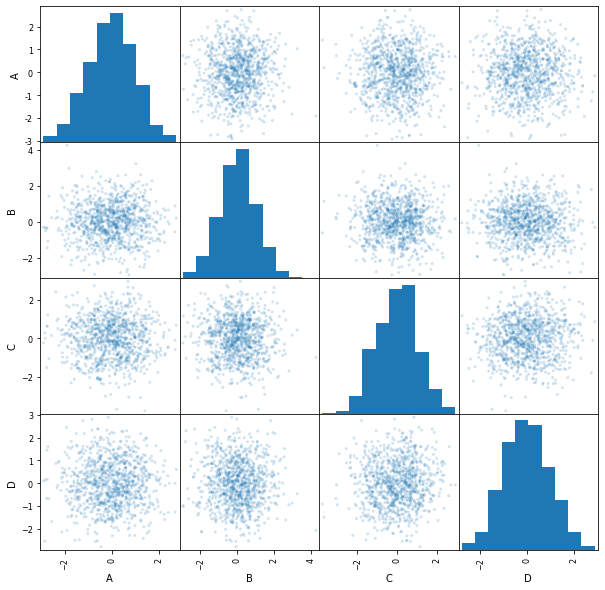

In [109]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10,10))

<AxesSubplot:xlabel='A', ylabel='B'>

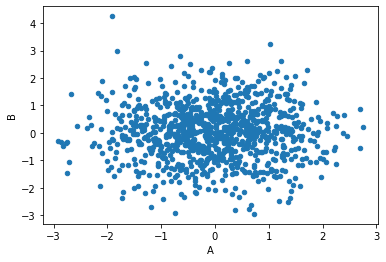

In [111]:
df.plot(kind="scatter", x="A", y="B")

# Simple linear regression model

In [113]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
housing = pd.read_csv('Housing.csv')
housing = housing.iloc[:,1:] # remove first index column

In [118]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Simple linear regression

$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i $

### Base on the association between LSTAT and MEDV and create a simple linear regression model. Let's use python in estimating the values of B0 and B1 (intercept and slope)

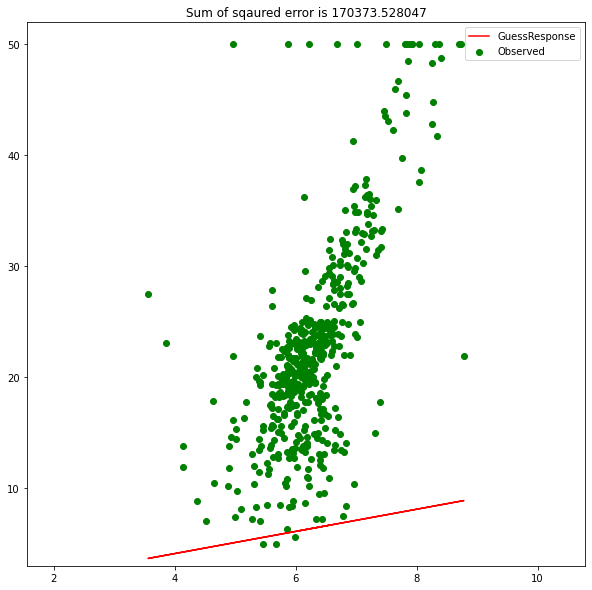

In [120]:
# lets try to guess what are the real values of intercept and slope
# we call our guess b0, b1...
# Try to assign the value of b0, b1 to get a straight line that can describe our data 
b0 = 0.1
b1 = 1
housing['GuessResponse'] = b0 + b1*housing['rm']

# Also want to know the error of of guess...
# This show how far is our guess response from the true response
housing['observederror'] = housing['medv'] - housing['GuessResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['observederror'])**2)).sum()))
plt.scatter(housing['rm'], housing['medv'], color='g', label='Observed')
plt.plot(housing['rm'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(housing['rm'].min()-2, housing['rm'].max()+2)
plt.ylim(housing['medv'].min()-2, housing['medv'].max()+2)
plt.show()

# Least sqaure estimates

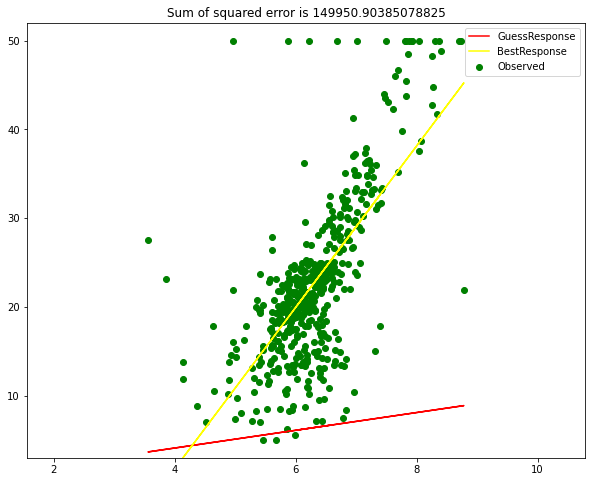

In [126]:
# Use RM to predict MEDV
formula = 'medv~rm'
model = smf.ols(formula=formula, data=housing).fit()

# Here are estimated intercept and slope by least square estimation
# Attribute 'params' returns a list of estimated parameters form model
b0_ols = model.params[0]
b1_ols = model.params[1]

# predicted value from ols
housing['BestResponse'] = b0_ols + b1_ols * housing['rm']
# error of of guess...
housing['error'] = housing['rm'] - housing['BestResponse']

# plot your estimated line together with the points
plt.figure(figsize=(10,8))
plt.scatter(housing['rm'], housing['medv'], color='g', label='Observed')
plt.plot(housing['rm'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.plot(housing['rm'], housing['BestResponse'], color='yellow', label='BestResponse')
plt.title('Sum of squared error is {}'.format(((housing['error'])**2).sum()))
plt.legend()
plt.xlim(housing['rm'].min() - 2, housing['rm'].max() + 2)
plt.ylim(housing['medv'].min() - 2, housing['medv'].max() + 2)
plt.show()

# Summary table

In [122]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 22 May 2021   Prob (F-statistic):           2.49e-74
Time:                        20:31:52   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Diagnostic of models

In [131]:
import pandas as pd 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
housing = pd.read_csv('Housing.csv')
housing = housing.iloc[:,1:]
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [136]:
model = smf.ols(formula='medv~lstat', data=housing).fit()

# get estimated intercept and slope by least square estimation 
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols * housing['lstat']

# Assumptions behind linear regression model
1. Linearity 
2. independence
3. Normality
4. Equal Variance

## Linearity

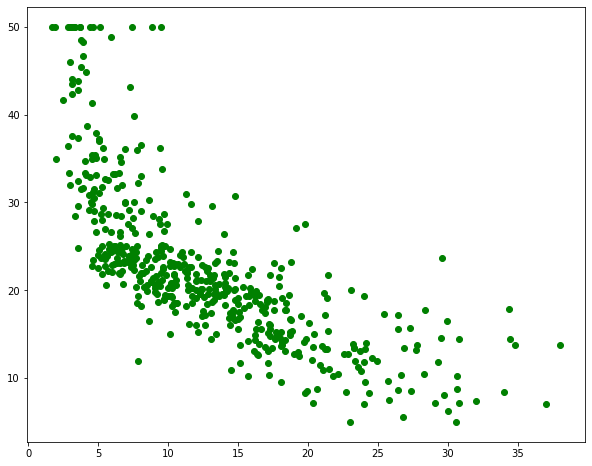

In [146]:
# check the scatter plot to have a fast check
plt.figure(figsize=(10, 8))
plt.scatter(housing['lstat'], housing['medv'], color='green')
# housing.plot(kind='scatter', x='lstat', y='medv', color='g', figsize=(10, 8))

# Independence (No autocorrelation)

In [144]:
# Get all errors (residuals)
housing['error'] = housing['medv'] - housing['BestResponse']

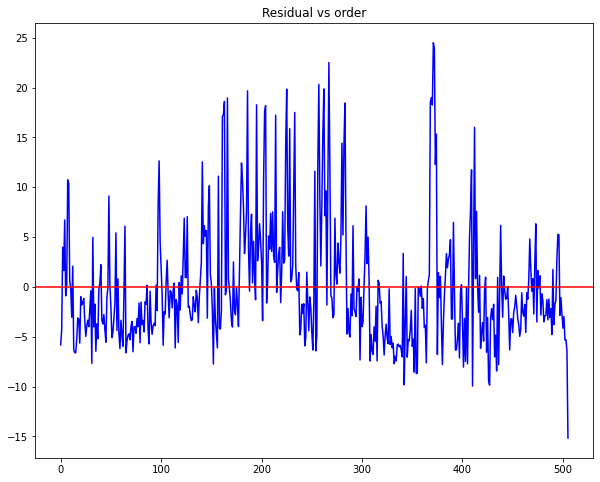

In [149]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(10, 8))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='b')
plt.axhline(y=0, color='r')
plt.show()

In [150]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary() # 0.892 means positive correlation

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 22 May 2021   Prob (F-statistic):           5.08e-88
Time:                        20:59:43   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Normality

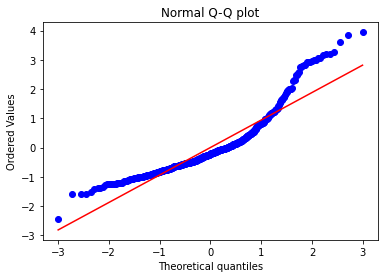

In [154]:
# QQ plot
import scipy.stats as stats

z = (housing['error'] - housing['error'].mean()) / housing['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()


# Equal variance

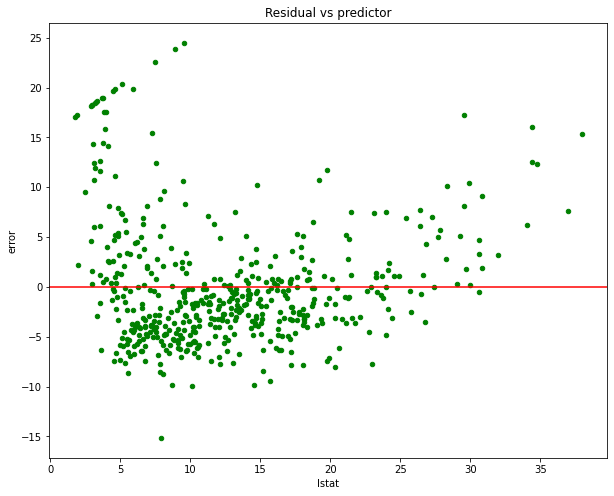

In [155]:
# Residual vs predictor plot
housing.plot(kind="scatter", x="lstat", y="error", color="g", figsize=(10,8))
plt.title('Residual vs predictor')
plt.axhline(y=0, color='r')
plt.show()

## We can see that the regression model (MEDV~LSTAT) violates all four assumptions. Therefore, we cannot make statistical inference using this model.

# Multiple linear regression model
* See the standalone Notebook

In [157]:
import os
outname = 'test.csv'
outdir = './data'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)    
df.to_csv(fullname)